# Data Analysis : Online Courses from Harvard and MIT

## Project Context

<pre>
<p style="font-family:Calibri Light;">
<p style="font-size:160%;">
This dataset contain online course information between 2012 and 2016. It records general statistic information such as percentage of Female/Male, % of students who has access more than 50% course material, % Played Video,etcs . Of all of those, "% Certified" is the most important one where it indicates the percentage of students who pass the course. 

Based on this dataset, we want to

 1.Understand course performance
 2.Understand student segmentation
 3.What subject area are students interested in
 4.What is the trend

The data can be downloaded from kaggle.
https://www.kaggle.com/edx/course-study/data
</p>
</p>
</pre>


## Hypothese
<font size="4">
1. What program has more student % certificate?
2. Do popular courses have more % certified?
3. What factors contribute to more students certifies?
</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#from altair import Chart
import seaborn as sns
from io import BytesIO
from IPython.display import display, Image, HTML
from base64 import b64encode
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import FuncFormatter
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

## Data Metadata

<pre>

<p style="font-family:Calibri Light;">
<font size="4">
Institution: Online course holders
Course Number    : The unique id of each course
Launch Date      : The launch date of each course
Course Title     : The title of each course>
Instructors      : The instructors of each course    
Course Subject   : The subject of each course
Year             : The last time of each course
Honor Code Certificates : with (1) Yes, without (0) No 
Certified : The number of participants who have been certified

% Audited :   The percent of The audited
% Certified : The percent of The certified
% Played Video : The percent of playing video
% Posted in Forum : The percent of posting in forum
% Grade Higher Than Zero : The percent of grade higher than zero 

Total Course Hours (Thousands) : Total course hours(per 1000)
Median Hours for Certification : Median hours for certification
Median Age : Median age of The participants

% Male : The percent of The male
% Female : The percent of The female
% Bachelor's Degree or Higher : The percent of bachelor's degree of higher
Participants (Course Content Accessed) : The number of participants who have accessed the course Audited (> 50% Course Content Accessed) : The number of participants who have audited more than 50% of the course
% Certified of > 50% Course Content Accessed :The percent of The certified with accessing The course more than 50%
</font>
</p>
</pre>






<pre>
<p style="font-family:Calibri Light;">
Before data analysis, let explore dataset to see if the data is clear or not, whethere there is null value or incorrect data type.
</p>
</pre>

In [2]:
#Read file
df=pd.read_csv('Online Courses from Harvard and MIT1.csv',encoding='latin1',parse_dates=['Launch Date'])
df[0:3]

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,2012-09-05,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-10-09,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 23 columns):
Institution                                     290 non-null object
Course Number                                   290 non-null object
Launch Date                                     290 non-null datetime64[ns]
Course Title                                    290 non-null object
Instructors                                     289 non-null object
Course Subject                                  290 non-null object
Year                                            290 non-null int64
Honor Code Certificates                         290 non-null int64
Participants (Course Content Accessed)          290 non-null int64
Audited (> 50% Course Content Accessed)         290 non-null int64
Certified                                       290 non-null int64
% Audited                                       290 non-null float64
% Certified                                     290 non-null float64
% Cert

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
Above information indicates that there are total 290 records and there is one null value in instructors field

The %Played Video is object datatype and we want it to be float64 for futher calculation
</font>
</p>
</pre>

In [4]:
df.select_dtypes(include=['object']).isnull().sum()

Institution       0
Course Number     0
Course Title      0
Instructors       1
Course Subject    0
% Played Video    0
dtype: int64

In [5]:
# replace --- to 0 and convert play video to number
df["% Played Video"].replace('---','0',inplace=True)
df["% Played Video"]=pd.to_numeric(df["% Played Video"])


In [6]:
df.shape

(290, 23)

In [7]:
round(df.describe(),2)

,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
count,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00,290.00
mean,3.17,0.81,15344.33,2549.17,843.81,24.92,7.78,31.45,63.71,9.35,21.21,94.98,44.36,29.30,67.01,32.99,72.08
std,0.91,0.39,28207.58,3095.16,1105.59,15.88,6.97,19.75,13.96,7.52,13.41,157.62,43.95,4.05,15.84,15.84,10.26
min,1.00,0.00,322.00,187.00,0.00,2.63,0.00,0.00,0.00,0.00,0.00,0.11,0.00,22.00,25.24,6.56,44.95
25%,3.00,1.00,3815.00,755.25,139.50,14.22,2.41,13.40,58.75,3.99,10.59,12.96,12.24,26.00,54.17,18.37,64.51
50%,3.00,1.00,7901.50,1517.00,395.50,20.42,5.95,31.27,65.95,7.24,19.60,37.71,26.96,29.00,66.52,33.48,73.06
75%,4.00,1.00,18038.25,3383.00,1201.75,33.84,10.69,47.62,72.34,14.11,30.90,97.22,64.18,31.00,81.63,45.83,79.24
max,4.00,1.00,301082.00,25637.00,5783.00,83.96,33.98,77.09,89.14,35.28,52.35,895.01,251.82,53.00,93.44,74.76,98.11


# 1. Which program has more student % certified?

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
Description : 

In order to explore the data and further elaboration. We will adapt top down analysis model where we check which course subject has the most student certified to start with, then later on break down data into different group to see the behaviour
</font>
</p>
</pre>


In [8]:
group = df[['Course Subject',"Participants (Course Content Accessed)"]]
group = group.groupby('Course Subject').agg("Participants (Course Content Accessed)").sum()
group

Course Subject
Computer Science                                        1527334
Government, Health, and Social Science                  1017960
Humanities, History, Design, Religion, and Education     822503
Science, Technology, Engineering, and Mathematics       1082060
Name: Participants (Course Content Accessed), dtype: int64

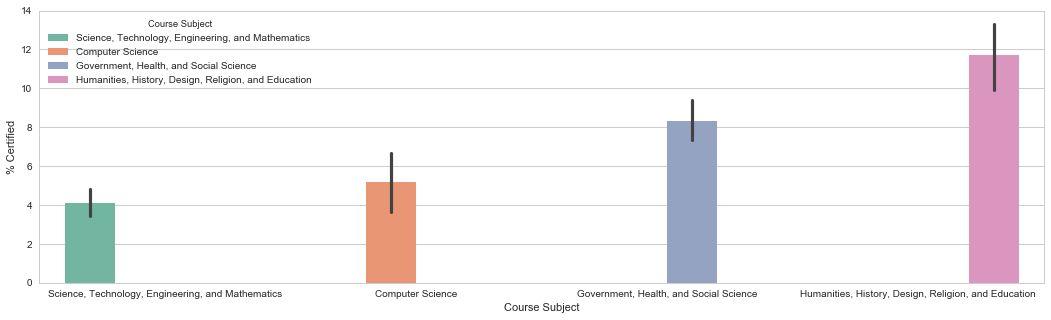

In [9]:
# Look at the highest percentage of certified
plt.figure(figsize=(18, 5))
g=sns.barplot(x='Course Subject', y='% Certified', data=df,hue='Course Subject',palette="Set2")

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
When compare the table and the bar chart, we observe that 

(1) Computer science (CS) has most students but its rank in certified rank is 3, implying that a certain number of students interest in the course but fail

(2) Government,Health and Social Science (GHS) and Sciencce, Technology, Engineering and Mathematics (STEM) have close number of enrolment but (GHS) has almost double certified rate from (STEM). 

(3) Humunities, History, Design, Religion and Education (HHDRE) has highest ranking. The result illustrates that (c)has more certified rate when compare to other three course subjects

    Around 4 % higher than Government, Health and Social Science
    Around 7 % higher than Computer Science
    Around 8 % highter than Science, Technology, Engineering and Mathematics

So later on, we want to see the this group distribution. To begin with, we will look at student gender to determine whether gender is a key of % certified in this subject area
</font>
</p>


</pre>

In [10]:
#Make a subset dataset - HHDRRE
Hudf= df[df['Course Subject']=='Humanities, History, Design, Religion, and Education']

In [11]:
round(Hudf.groupby('Course Subject').agg(['mean', 'std']),2)

Year        \
                                                    mean   std   
Course Subject                                                   
Humanities, History, Design, Religion, and Educ...  3.27  0.83   

                                                   Honor Code Certificates  \
                                                                      mean   
Course Subject                                                               
Humanities, History, Design, Religion, and Educ...                    0.82   

                                                          \
                                                     std   
Course Subject                                             
Humanities, History, Design, Religion, and Educ...  0.39   

                                                   Participants (Course Content Accessed)  \
                                                                                     mean   
Course Subject                                                                              
Humanities, History, Design, Religion, and Educ...                                8750.03   

                                                              \
                                                         std   
Course Subject                                                 
Humanities, History, Design, Religion, and Educ...  11217.77   

                                                   Audited (> 50% Course Content Accessed)  \
                                                                                      mean   
Course Subject                                                                               
Humanities, History, Design, Religion, and Educ...                                  1741.8   

                                                            Certified          \
                                                        std      mean     std   
Course Subject                                                                  
Humanities, History, Design, Religion, and Educ...  1744.84    704.44  924.95   

                                                    ...   \
                                                    ...    
Course Subject                                      ...    
Humanities, History, Design, Religion, and Educ...  ...    

                                                   Median Hours for Certification  \
                                                                             mean   
Course Subject                                                                      
Humanities, History, Design, Religion, and Educ...                          17.64   

                                                          Median Age        \
                                                      std       mean   std   
Course Subject                                                               
Humanities, History, Design, Religion, and Educ...  16.57      32.87  4.12   

                                                   % Male        % Female  \
                                                     mean    std     mean   
Course Subject                                                              
Humanities, History, Design, Religion, and Educ...  53.46  11.18    46.54   

                                                           \
                                                      std   
Course Subject                                              
Humanities, History, Design, Religion, and Educ...  11.18   

                                                   % Bachelor's Degree or Higher  \
                                                                            mean   
Course Subject                                                                     
Humanities, History, Design, Religion, and Educ...                         75.13   

                                                          
                                                     std

(-1.1841541319329285,
 1.1121394031156169,
 -1.1894089344116927,
 1.108534472517767)

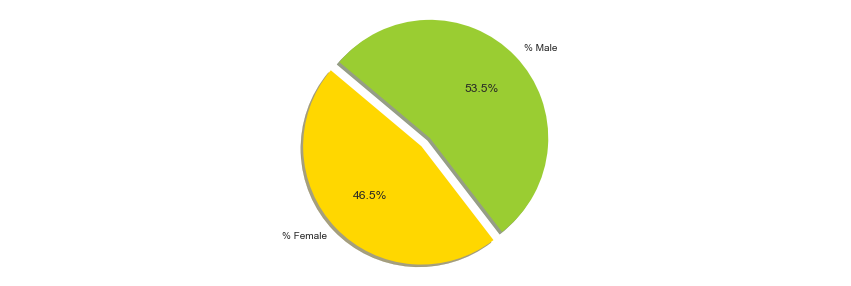

In [12]:
plt.figure(figsize=(15, 5))
Female=Hudf['% Female'].mean()
Male=Hudf['% Male'].mean()
labels = ['%Male','%Female']
values = [Male,Female]

# Data to plot
labels = '% Female', '% Male'
sizes = [Female, Male]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
The pie chart represents the gender distribution in HHDRE course where Male has around 7% enrollment rate more than that of Female. This observation show that there is no strong correlation either the higher Male/Female enrollment rate that lead to higher % certified. As a result, we can not use this parameter as a key to tell that gender can explain the % certified rate.

So for now, the next approach will examine other attributes in (HHDRE) and break down the data into different grouping for observation. For example, 

 % Bachelor's Degree or higher,
 % Certified of > 50% Course Content Accessed and
 % Posted in Forum
</font>
</pre>

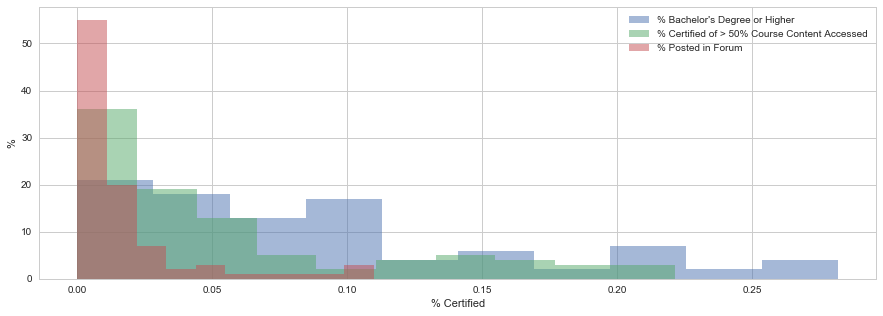

In [13]:
plt.figure(figsize=(15, 5))
plt.hist((Hudf["% Bachelor's Degree or Higher"]/100*Hudf['% Certified']/100), alpha=0.5, label="% Bachelor's Degree or Higher") 
plt.hist((Hudf["% Certified of > 50% Course Content Accessed"]/100*Hudf['% Certified']/100), alpha=0.5, label="% Certified of > 50% Course Content Accessed") 
plt.hist((Hudf["% Posted in Forum"]/100*Hudf['% Certified']/100), alpha=0.5, label="% Posted in Forum")
plt.xlabel("% Certified")
plt.ylabel("%")
plt.legend(loc='best')
plt.show()


<pre>
<p style="font-family:Calibri Light;">
<font size="4">
This chart represents that the distribution among % Degree, %>50 course content and %posted in forum against % certified

Finding

<U>Student with bahelor degree or higher ,do not access >50% course content and less participant in forum </U>
The major factor to % certified is "student with Bachelor's Degree or higher". When looking at the %X-asix value from 0.225% to 0.25, you may notice this area is in pure blue color, meaning students with bachelor degree do not access half of the course content and not participant in the forum has also passed the course. 

<U>Student with bahelor degree or higher ,Access >50% course content and participant in forum </U>
On the other hand, we note that one group of students has degree , access >50% course content that has certified rate from 0.00 to 0.1 % only.

<U>Student access >50% course content and participant in forum frequently</U>
We note students watch more than half course content do not increase the success rate to the course. From the obversation that the green spot from 0.00 to 0.05 representing even around 30% stduents access more than 50% course, it has only less than 0.05 % certified


And next we want to further analysis student with Bachelor's Degree or Higher 
</font>
</p>
</pre>

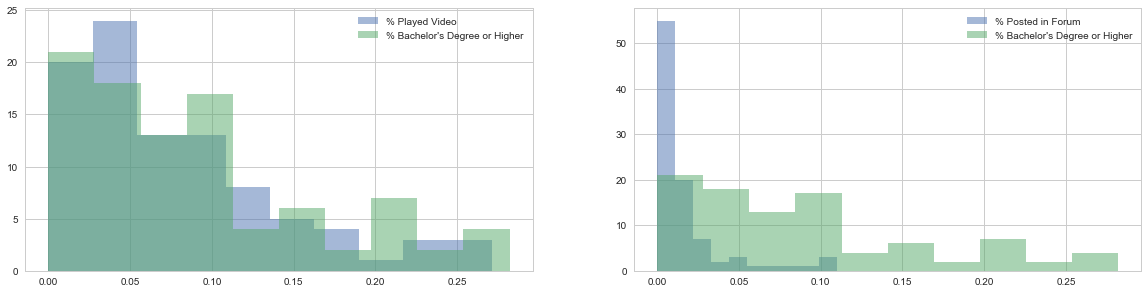

In [14]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist((Hudf['% Played Video']/100*Hudf['% Certified']/100 ), alpha=0.5, label='% Played Video') 
plt.hist((Hudf["% Bachelor's Degree or Higher"]/100*Hudf['% Certified']/100 ), alpha=0.5, label="% Bachelor's Degree or Higher") 
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.hist((Hudf['% Posted in Forum']/100*Hudf['% Certified']/100 ), alpha=0.5, label='% Posted in Forum') 
plt.hist((Hudf["% Bachelor's Degree or Higher"]/100*Hudf['% Certified']/100 ), alpha=0.5, label="% Bachelor's Degree or Higher") 
plt.gcf().subplots_adjust(bottom=0.15)
plt.legend(loc='best')
plt.show()

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
<U>Student with bahelor degree or higher ,do not have higher % played video </U>
Similar to preious finding, student with low % played video has higher % certified when look at the %X-asix value from 0.2% to 0.28.When compare to 0.00 to 0.1 % certified that around 10%-20% played video, it has only less than 5% played video 

<U>Student with high % played video do not increase the % certified </U>
On the other hand, we note that this group has only certified rate from 0.00 to 0.1 %.

<U>Student participant in forum frequently do not pass</U>
We note students participant in forum has more than 50% but do not lead to pass


<b>Finding </b>

The above analysis shows that the played video and forum may not be the key to help students to certified, nor the course content. Student with bachelor degree may access material outside the course that lead to higher certified rate. 
</font>
</p>
</pre>

# 2 - Do popular courses have more % certified?

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
Description : 

Next, we want to see whether courses with more students enrolled has higher certified rate. Conceptually, students has higher interest in the course will spend more time on the subject that lead to pass the course. As we don not have student personal study data, so alternative way we try to examine whether the course is popular by considering the number of student enrollment.

The first approach in this analysis is to create a scatter chart to spot out how many student enrol in course. Then further drill down the analysis.
</font>
</p>
</pre>

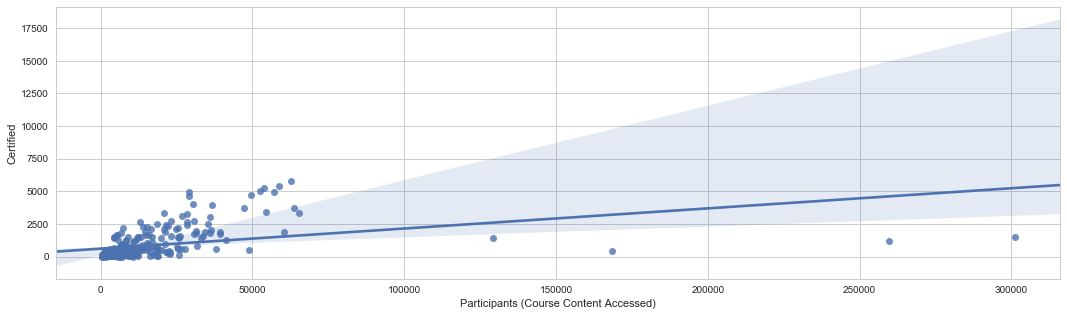

In [15]:
plt.figure(figsize=(18, 5))
ax = sns.regplot(x="Participants (Course Content Accessed)", y="Certified", data=df)

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
The above chart shows that there are four courses that had more than 100,000 erollments.So it can be identified as popular courses to students. However, when compare its certified rate to other courses, it has lower value. This tell us that although it is a popular courses but it has low % certified rate. And it is interesting to find out the reason behind this.

For the next, we will examine this four courses with other attributes
</font>
</p>
</pre>

In [16]:
subdf= df.loc[df["Participants (Course Content Accessed)"] > 100000 ] 
subdf

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
3,HarvardX,CS50x,2012-10-15,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0.00,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78
32,HarvardX,CS50x,2014-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,259577,22894,...,5.24,72.41,0.0,0.00,853.36,0.0,27.0,77.89,22.11,54.82
99,HarvardX,CS50x,2015-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,301082,25637,...,5.45,67.80,0.0,0.00,275.96,0.0,25.0,77.68,22.32,51.95
221,HarvardX,CS50x,2016-01-01,Introduction to Computer Science (2016),NaN,Computer Science,4,1,168335,10245,...,2.93,69.02,0.0,0.00,708.69,0.0,23.0,77.44,22.56,49.51


<pre>
<p style="font-family:Calibri Light;">
<font size="4">
The result shows Introduction to Computer Science was the most popular course between 2012 to 2016. When it hit to the peak in 2015, it had more than 300,000 enrolments. And it is good to look at the trend between these year with other attributes to see if any correlation .

Let look at the enrolment trend during 2012 to 2016
</font>
</p>
</pre>

d:\Users\L\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



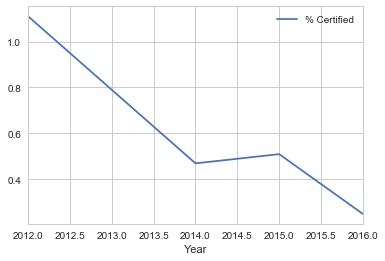

In [17]:
subdf['Year']=subdf["Launch Date"].dt.year
asubdf=subdf[['Year',"% Certified"]]
asubdf.index = asubdf['Year']
del asubdf['Year']
asubdf.plot()

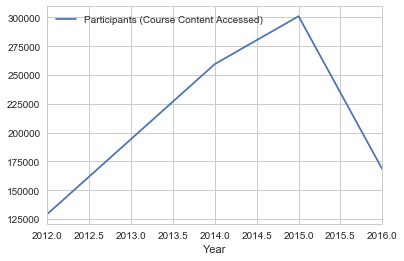

In [18]:
bsubdf=subdf[['Year',"Participants (Course Content Accessed)"]]
bsubdf.index = bsubdf['Year']
del bsubdf['Year']
bsubdf.plot()

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
The result shows Introduction to Computer Science between 2012 to 2015, there were shapely increasing in student enrolment and also at the same time,the certified rate had dropped. This conclude that more students enrolled in course won't contribute to higher % certified rate.  
Alternatively, when looking at 2015 to 2016, the participants dropped while the # certified rate had dropped also. Based on these two finding, we can see that there is not strong relationship between participants and % certified. 

Refer to question 1 where we know that holding a bachelor certificate may lead to more certified rate. So we will plot a line chart with it and explore the pattern for further analysis.
</font>
</p>
</pre>

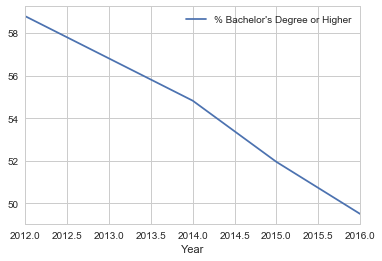

In [19]:
csubdf=subdf[['Year',"% Bachelor's Degree or Higher"]]
csubdf.index = csubdf['Year']
del csubdf['Year']
csubdf.plot()

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
This chart shows that there were a dramatically decreased number of % Bachelors degree holders enrol in introduction to computer science course. When compare it with previous % certified time series chart, these two charts patterns are similar in a way that they ran down from 2012 to 2016.

Also, Participants time series chart has shown that there were more students enrollment in this course. When compare it with % Bachelor chart, this implies that more non-bachelor degree hold enrolled the course.

Next we will look at other attributes to see any more information hidden from the data
</font>
</p>
</pre>

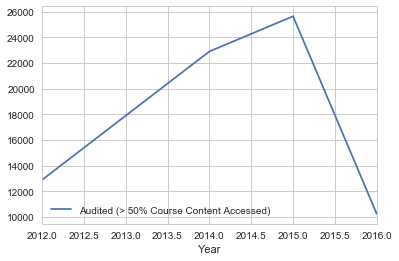

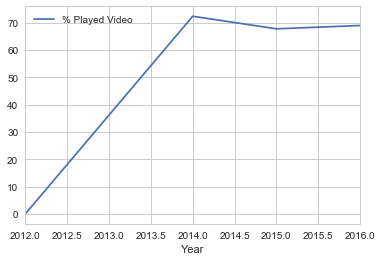

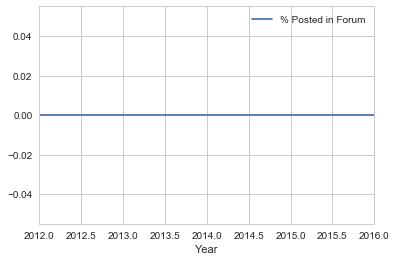

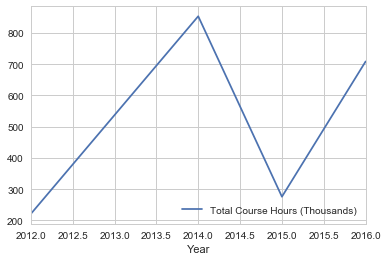

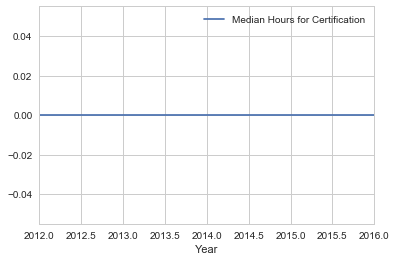

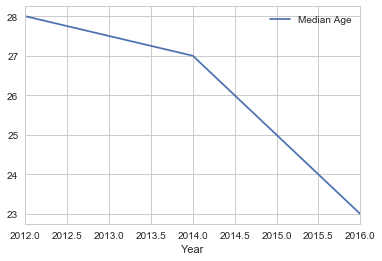

In [20]:
csubdf=subdf[['Year',"Audited (> 50% Course Content Accessed)"]]
csubdf.index = csubdf['Year']
del csubdf['Year']
csubdf.plot()
csubdf=subdf[['Year',"% Played Video"]]
csubdf.index = csubdf['Year']
del csubdf['Year']
csubdf.plot()
csubdf=subdf[['Year',"% Posted in Forum"]]
csubdf.index = csubdf['Year']
del csubdf['Year']
csubdf.plot()
csubdf=subdf[['Year',"Total Course Hours (Thousands)"]]
csubdf.index = csubdf['Year']
del csubdf['Year']
csubdf.plot()
csubdf=subdf[['Year',"Median Hours for Certification"]]
csubdf.index = csubdf['Year']
del csubdf['Year']
csubdf.plot()
csubdf=subdf[['Year',"Median Age"]]
csubdf.index = csubdf['Year']
del csubdf['Year']
csubdf.plot()

<font size="4">
Unfortunately, there are not much information that can tell us whethere other attributes explain why the % certified in this course dropped. The next bar charts has served the similar purpose as the line chart, i have inluded it for referencce only.
</font>

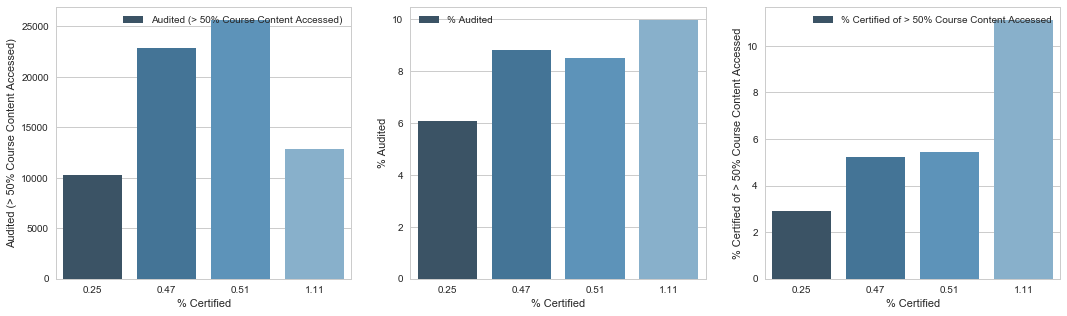

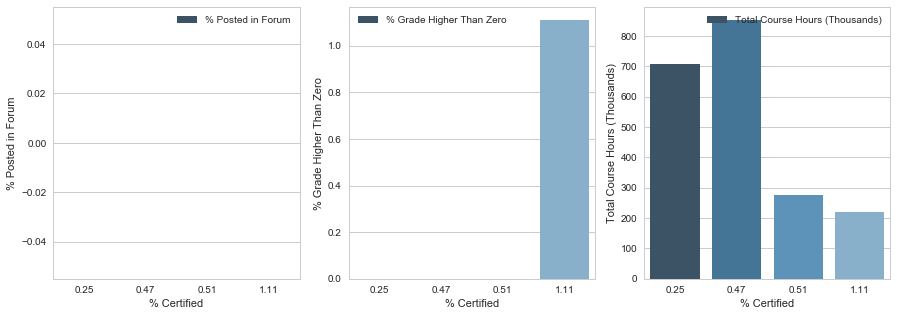

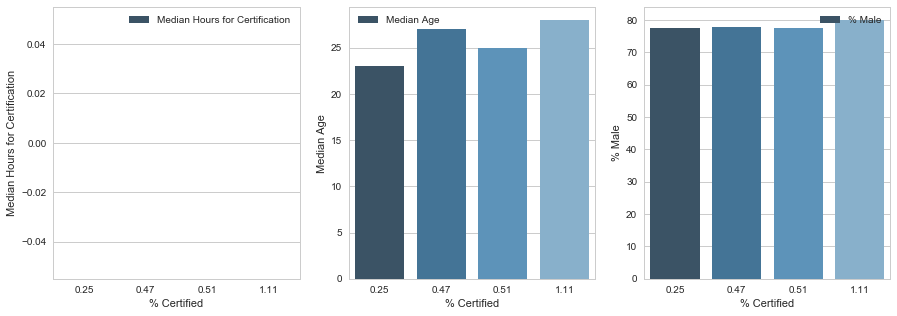

In [21]:
asubdf = subdf[["Launch Date","Audited (> 50% Course Content Accessed)",
               "Certified","% Audited","% Certified","% Certified of > 50% Course Content Accessed",
               "% Played Video","% Posted in Forum","% Grade Higher Than Zero",
               "Total Course Hours (Thousands)","Median Hours for Certification",
               "Median Age","% Male","% Female","% Bachelor's Degree or Higher"]]

plt.figure(figsize=(18, 5))
plt.subplot(1,3, 1)
sns.barplot("% Certified", y="Audited (> 50% Course Content Accessed)",palette="Blues_d",data=asubdf, label="Audited (> 50% Course Content Accessed)")
plt.legend(loc='best')
plt.subplot(1,3, 2)
sns.barplot("% Certified", y="% Audited",palette="Blues_d",data=asubdf,label="% Audited")
plt.legend(loc='best')
plt.subplot(1,3, 3)
sns.barplot("% Certified", y="% Certified of > 50% Course Content Accessed",palette="Blues_d",data=asubdf,label="% Certified of > 50% Course Content Accessed")
plt.legend(loc='best')
plt.figure(figsize=(15, 5))
plt.subplot(1,3, 1)
sns.barplot("% Certified", y="% Posted in Forum",palette="Blues_d",data=asubdf,label="% Posted in Forum")
plt.legend(loc='best')
plt.subplot(1,3, 2)
sns.barplot("% Certified", y="% Grade Higher Than Zero",palette="Blues_d",data=asubdf,label="% Grade Higher Than Zero")
plt.legend(loc='best')
plt.subplot(1,3, 3)
sns.barplot("% Certified", y="Total Course Hours (Thousands)",palette="Blues_d",data=asubdf,label="Total Course Hours (Thousands)")
plt.legend(loc='best')
plt.figure(figsize=(15, 5))
plt.subplot(1,3, 1)
sns.barplot("% Certified", y="Median Hours for Certification",palette="Blues_d",data=asubdf,label="Median Hours for Certification")
plt.legend(loc='best')
plt.subplot(1,3, 2)
sns.barplot("% Certified", y="Median Age",palette="Blues_d",data=asubdf,label="Median Age")
plt.legend(loc='best')
plt.subplot(1,3, 3)
sns.barplot("% Certified", y="% Male",palette="Blues_d",data=asubdf,label="% Male")
plt.legend(loc='best')

In [22]:
np.random.seed(1234567890)


rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
<b>Finding </b>

More student enrollment may not lead to higher % certified rate. On the other hand, the more important point that increase the % certified rate is the student bakground. Other attributes may impact the % certified rate but not as strong as % bechelor degree holders
</font>
</p>
</pre>

## 3. What factors contribute to more student certifies?


<pre>
<p style="font-family:Calibri Light;">
<font size="4">
Description : 

We have break down the course infomration into a specified course subject  and drill down  to the detail. And it is interesting to look at all attribute in overall dataset. So that we can get a broad understand the overall picture of the course information

Firstly we will run a regression setting  the target - % Certified vs other attributes
</font>
</p><pre>

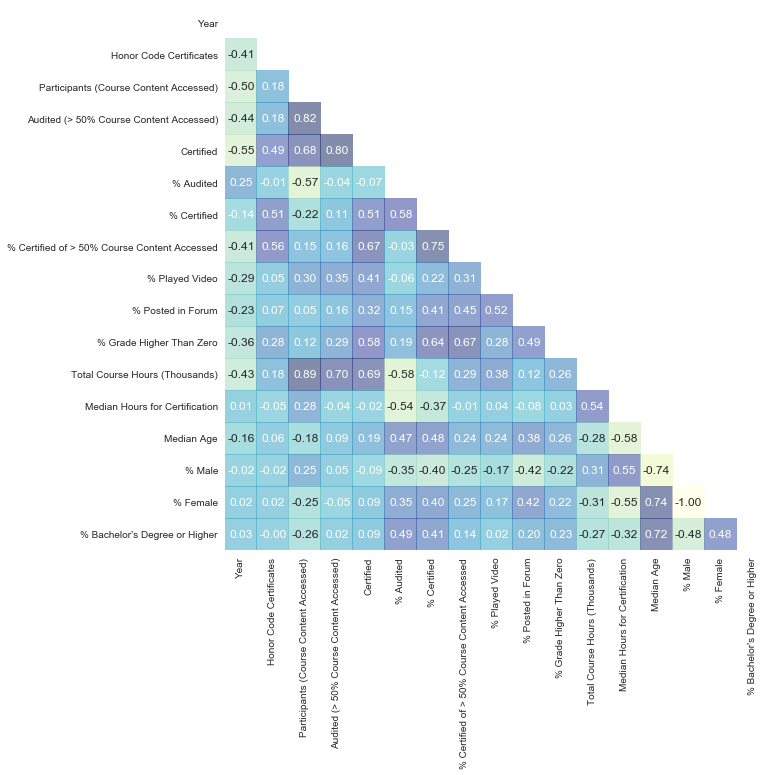

In [23]:
# heatmap
corrmat = df.corr(method='spearman') #use spearman method because all the data is ordinal
f, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap using seaborn
sns.heatmap(corrmat, cmap="YlGnBu",vmax=.8, mask=mask,square=True,annot=True,fmt='.2f', alpha=0.5,cbar=False) 
plt.show()  

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
The correlation of %Certified show that the most relevant to the certifie.

This below tell us how strong the attributes has positive correlation to % Certified in order.

    0.75    % Certified of >50 % course content Acccessed
    0.58    %Audited
    0.51    Honor Code certicate
    0.48    Median Age
    0.41    % Bachelor Degree or Higher
    0.4     % Female

This below tell us how strong the attributes has negative correlation to % Certified in order.

    -0.5    % Male
    -0.37   Median Hours  for Certifiation

As it is common to have grade that is greater than 0 to pass for the course, so  below items even though has a  degree of positive correlation to % Certified, but do not take  into account for analysis

    0.64   Grade higher than 0 
    0.51   Certified

Next,  we will plot % Certified of >50 % course content Acccessed , Honor Code certicate and Median Age in scatter charts
</font>
<p>
</pre>

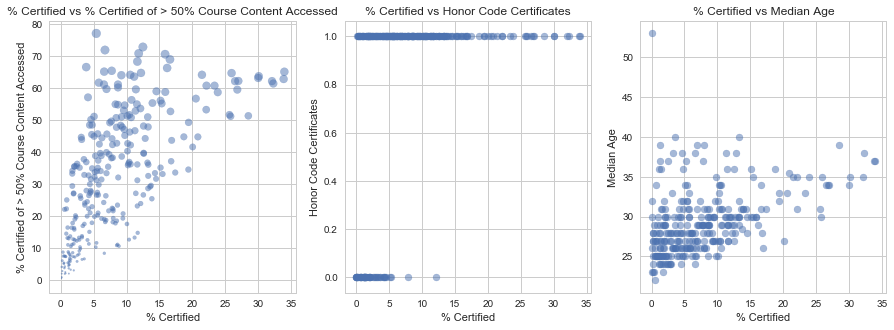

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)

N = 50
np.random.seed(19680801)
x = df["% Certified"]
y = df["% Certified of > 50% Course Content Accessed"]
#colors = np.random.rand(N)
area = df["% Certified of > 50% Course Content Accessed"]
plt.title("% Certified vs % Certified of > 50% Course Content Accessed")
plt.xlabel("% Certified")
plt.ylabel("% Certified of > 50% Course Content Accessed")
plt.scatter(x, y, s=area, alpha=0.5) 

plt.subplot(1, 3, 2)
x = df["% Certified"]
y = df["Honor Code Certificates"]
area = df["Honor Code Certificates"]
plt.title("% Certified vs Honor Code Certificates")
plt.xlabel("% Certified")
plt.ylabel("Honor Code Certificates")
plt.scatter(x, y, alpha=0.5)

plt.subplot(1, 3, 3)
x = df["% Certified"]
y = df["Median Age"]
area = df["Median Age"]
plt.title("% Certified vs Median Age")
plt.xlabel("% Certified")
plt.ylabel("Median Age")
plt.scatter(x, y, alpha=0.5)


<pre>
<p style="font-family:Calibri Light;">
<font size="4">
The % Certified of > 50% Course Content Accessed and Median Age has shown the positive correlation against % Certified. One point that can be made  is  that on Median Age chart where students who under age of 30 has range of 0  to 15 % certified rate while under age of 40 has a broader range from 0 to 35 % certified rate.

Course with honor code certificates has higher range from  0 to 35 % while non-honor certificates has only 0 to  13 %.
</font>
</p>
</pre>

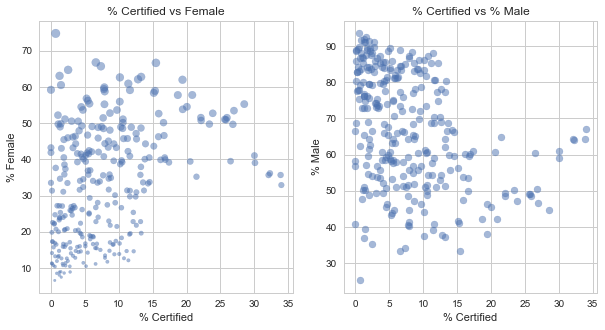

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

N = 50
np.random.seed(19680801)
x = df["% Certified"]
y = df["% Female"]

area = df["% Female"]
plt.title("% Certified vs Female")
plt.xlabel("% Certified")
plt.ylabel("% Female")
plt.scatter(x, y, s=area, alpha=0.5) 

plt.subplot(1, 2, 2)

x = df["% Certified"]
y = df["% Male"]
area = df["% Male"]
plt.title("% Certified vs % Male")
plt.xlabel("% Certified")
plt.ylabel("% Male")
plt.scatter(x, y, alpha=0.5)

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
In overall course, the above charts illustrates that the female has positive ccorrelation to % certified rate while male has negative correlation
</font>
</p>
</pre>

## Conclusion

<pre>
<p style="font-family:Calibri Light;">
<font size="4">
The original question we have 

1. What program has more student % certificate?
The Humanities, History, Design, Religion, and Education (HHDRE)  has more students certified while it has lower enrollment

2. Do popular courses have more % certified?
Negative result - The Introduction to Computer Science had more student enrollmment and less % certified. Of which student without a bachelor degree or higher has more than who has it

3. What factors contribute to more students certifies?
There are main positive factors
    % Certified of >50 % course content Acccessed, %Audited, Honor Code certicate, Median Age, % Bachelor Degree or Higher and % Female

Netgative factors
   % Male, Median Hours for Certifiation


<U>Future approach</U>
With aim to increase the certified rate, we suggest to increase the entry boundary. For students who do not have a bachelor degree or equivalent, It'd better to have a knowledge test as course prerequisite for entry.

The low % played video and forum may need to review the reason behind. Whether it caused by the quality, content, etcs 
</font>
</p>
</pre>